In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     |████████████████████████████████| 86 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 9.5 MB/s 
     |████████████████████████████████| 15.8 MB 27.2 MB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 
     |████████████████████████████████| 837 kB 42.0 MB/s 
     |████████████████████████████████| 134 kB 40.1 MB/s 
     |████████████████████████████████| 830 kB 42.2 MB/s 
     |████████████████████████████████| 822 kB 46.2 MB/s 
     |████████████████████████████████| 802 kB 52.5 MB/s 
     |████████████████████████████████| 802 kB 42.1 MB/s 
     |████████████████████████████████| 793 kB 13.6 MB/s 
     |████████████████████████████████| 793 kB 47.1 MB/s 
     |████████████████████████████████| 791 kB 30.3 MB/s 
     |████████████████████████████████| 786 kB 32.9 MB/s 
     |████████████████████████████████| 779 kB 46.5 MB/s 
     |████████████████████████████████| 778 kB 38.3 MB/s 
     |████████████████████████████████| 776 kB 36.5 MB/s 
     |████████████

In [ ]:
# Importation des différentes librairies utiles pour le notebook
#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# librairies générales
import pickle
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy
# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# TensorFlow et keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pathlib
from google.colab import drive
import PIL
import PIL.Image


In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_dir = "gdrive/My Drive/dataClean/train"
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)
print(data_dir)

2039
gdrive/My Drive/dataClean/train


In [ ]:
abeilles = list(data_dir.glob('abeille/*'))
alveoles = list(data_dir.glob('alveole/*'))

In [ ]:
batch_size = 32
img_height = 24
img_width = 25


In [ ]:
image_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2,
        horizontal_flip=True)


In [ ]:
train_generator = image_generator.flow_from_directory(
        data_dir,
        target_size=(24, 25),
        batch_size=32,
        class_mode='binary',
        color_mode = "grayscale",
        subset='training')

Found 1632 images belonging to 2 classes.


In [ ]:
validation_generator = image_generator.flow_from_directory(
        data_dir,
        target_size=(24, 25),
        batch_size=32,
        class_mode='binary',
        color_mode = "grayscale",
        subset="validation")

Found 407 images belonging to 2 classes.


In [ ]:
train_generator.shape()

AttributeError: ignored

In [ ]:
num_classes = 2
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.5), #ici
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
  #Xtest
  #YTest
  #Learning rate
])

2022-03-25 00:35:42.298808: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=49,
        epochs=50,#Plus d'epoch
        validation_data=validation_generator,
        validation_steps=800)

Epoch 1/50
49/49 [==============================] - 6s 113ms/step - loss: 0.3922 - accuracy: 0.8189 - val_loss: 0.2016 - val_accuracy: 0.9312
Epoch 2/50
49/49 [==============================] - 5s 96ms/step - loss: 0.3637 - accuracy: 0.8508
Epoch 3/50
49/49 [==============================] - 5s 95ms/step - loss: 0.3611 - accuracy: 0.8367
Epoch 4/50
49/49 [==============================] - 4s 91ms/step - loss: 0.3530 - accuracy: 0.8514
Epoch 5/50
49/49 [==============================] - 5s 100ms/step - loss: 0.3794 - accuracy: 0.8278
Epoch 6/50
49/49 [==============================] - 5s 92ms/step - loss: 0.3981 - accuracy: 0.8131
Epoch 7/50
49/49 [==============================] - 5s 110ms/step - loss: 0.3670 - accuracy: 0.8393
Epoch 8/50
49/49 [==============================] - 4s 91ms/step - loss: 0.3846 - accuracy: 0.8316
Epoch 9/50
49/49 [==============================] - 4s 88ms/step - loss: 0.3726 - accuracy: 0.8380
Epoch 10/50
49/49 [==============================] - 4s 89ms/ste

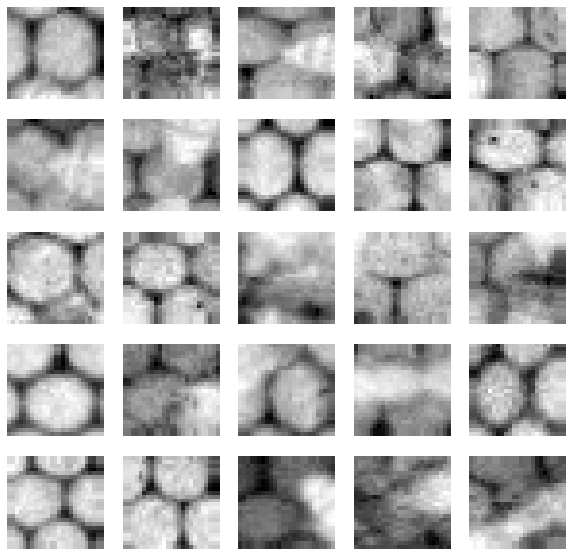

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    img, label = train_generator.next()
    plt.imshow(img[i].squeeze(),cmap=plt.cm.binary)
    plt.axis("off")

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = "gdrive/My Drive/dataClean/test"
test_dir = pathlib.Path(data_dir)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (24, 25),
    batch_size=32,
    class_mode='binary',
    color_mode = "grayscale")
filenames = test_generator.filenames
nb_samples = len(filenames)

Found 2039 images belonging to 2 classes.


In [ ]:
predict = model.predict(test_generator)

In [ ]:
print(test_generator.labels)

[0 0 0 ... 1 1 1]


In [ ]:
label_map = (test_generator.class_indices)
print(label_map)

{'abeille': 0, 'alveole': 1}


In [ ]:
def plot_curves_confusion (history,confusion_matrix,class_names):
  plt.figure(1,figsize=(16,6))
  plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1,
  top = 0.9, wspace = 0.25, hspace = 0)
  # division de la fenêtre graphique en 1 ligne, 3 colonnes,
  # graphique en position 1 - loss fonction
  plt.subplot(1,3,1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Training loss', 'Validation loss'], loc='upper left')
  # graphique en position 2 - accuracy
  plt.subplot(1,3,2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
  # matrice de correlation
  plt.subplot(1,3,3)
  sns.heatmap(conf,annot=True,fmt="d",cmap='Blues',xticklabels=class_names, yticklabels=class_names)# label=class_names)
  # labels, title and ticks
  plt.xlabel('Predicted', fontsize=12)
  #plt.set_label_position('top')
  #plt.set_ticklabels(class_names, fontsize = 8)
  #plt.tick_top()
  plt.title("Correlation matrix")
  plt.ylabel('True', fontsize=12)
  #plt.set_ticklabels(class_names, fontsize = 8)
  plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, None, None, None)  0         
                                                                 
 conv2d (Conv2D)             (None, None, None, 32)    320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 32)   0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, None, None, 32)    0         
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                    

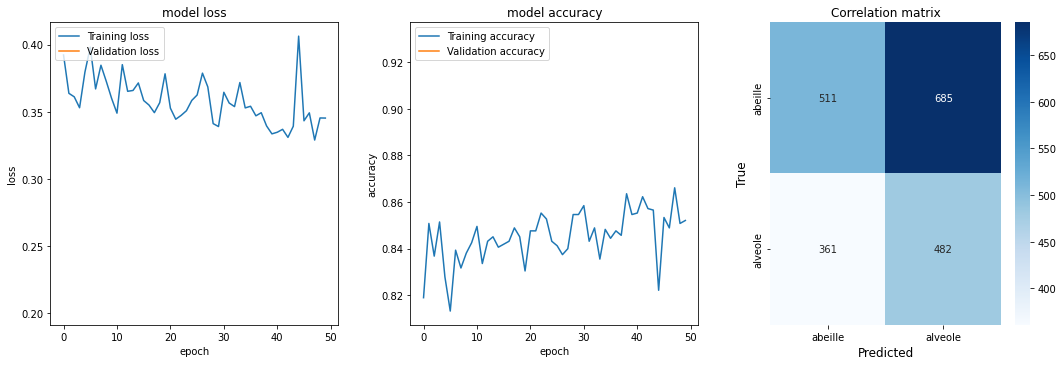

In [ ]:
print(model.summary())
y_pred=np.argmax(predict,axis=1)
print("Accuracy sur le jeu de test", accuracy_score(test_generator.labels, y_pred))

conf=confusion_matrix(test_generator.labels,y_pred)
plot_curves_confusion(history,conf,label_map)